In [1]:
import pandas as pd
from pylab import *
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("data/tips.csv")

## Data info

In [3]:
print(f"cols: {df.columns.values}")
print(f"size: {df.shape[0]}")

cols: ['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']
size: 244


In [4]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [5]:
df.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [6]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

**in persentage**

In [7]:
df.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [8]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
df.day.nunique()

4

## Grouping

In [10]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg(["sum"])

total_bill     tip
                     sum     sum
sex    smoker                   
Female No         977.68  149.77
       Yes        593.27   96.74
Male   No        1919.75  302.00
       Yes       1337.07  183.07

In [11]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg({"total_bill":"mean", "tip":"mean"})

total_bill       tip
sex    smoker                      
Female No       18.105185  2.773519
       Yes      17.977879  2.931515
Male   No       19.791237  3.113402
       Yes      22.284500  3.051167

In [12]:
df.groupby("smoker")["total_bill", "tip"].agg("mean").add_prefix("mean_")

,mean_total_bill,mean_tip
smoker,,
No,19.188278,2.991854
Yes,20.756344,3.008710


In [13]:
df.groupby("day").tip.agg(["count", "min", "max", "mean"])

,count,min,max,mean
day,,,,
Fri,19,1.00,4.73,2.734737
Sat,87,1.00,10.00,2.993103
Sun,76,1.01,6.50,3.255132
Thur,62,1.25,6.70,2.771452


In [14]:
df.groupby("day").tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [15]:
df.groupby("day")["tip", "total_bill", "size"].mean()

,tip,total_bill,size
day,,,
Fri,2.734737,17.151579,2.105263
Sat,2.993103,20.441379,2.517241
Sun,3.255132,21.410000,2.842105
Thur,2.771452,17.682742,2.451613


## Visualisation

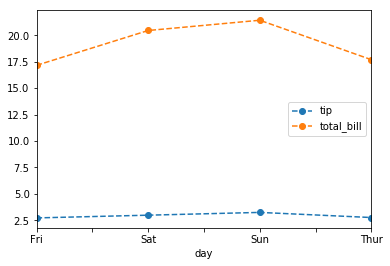

In [16]:
# ["Thur", "Fri", "Sat", "Sun"]
df.groupby("day")["tip", "total_bill"].mean().plot(linestyle='dashed', marker='o');

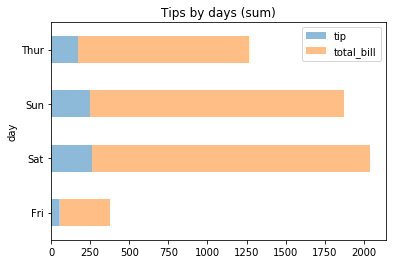

In [17]:
df.groupby("day")["tip", "total_bill"].sum().plot(kind='barh', stacked=True, alpha=0.5, title="Tips by days (sum)");

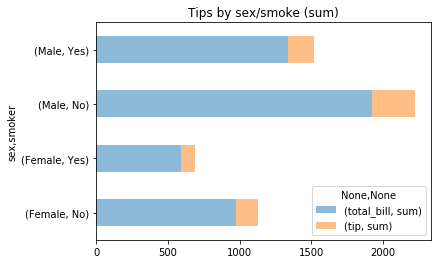

In [18]:
df.groupby(["sex", "smoker"])[["total_bill", "tip"]].agg(["sum"]).plot(
    kind="barh", stacked=True, alpha=0.5, title="Tips by sex/smoke (sum)");

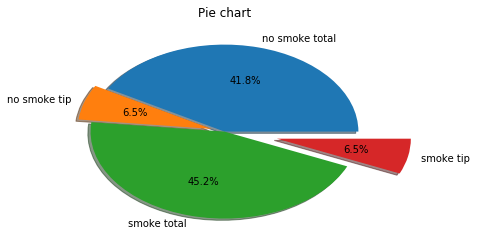

In [19]:
title("Pie chart");
pie(df.groupby("smoker")["total_bill", "tip"].agg("mean").values.flatten(),
        explode=(0, 0.1, 0, 0.4), shadow=True, autopct="%1.1f%%",
        labels=("no smoke total", "no smoke tip", "smoke total", "smoke tip"));

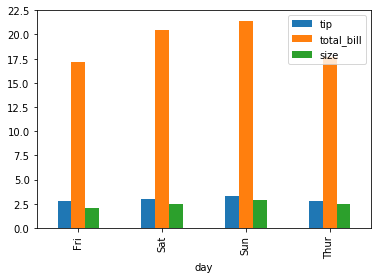

In [21]:
df.groupby("day")["tip", "total_bill", "size"].mean().plot(kind="bar");